In [1]:
from utils import read_and_standardize_data
import classifier as cl

{'sensitivity': 0.9, 'specificity': 0.6222222222222222, 'precision': 0.20930232558139536}


<Figure size 640x480 with 0 Axes>

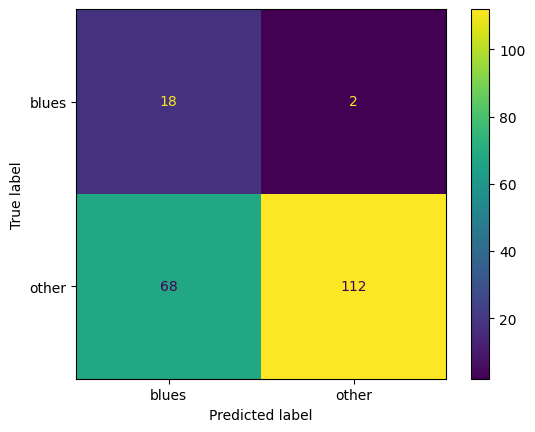

<Figure size 640x480 with 0 Axes>

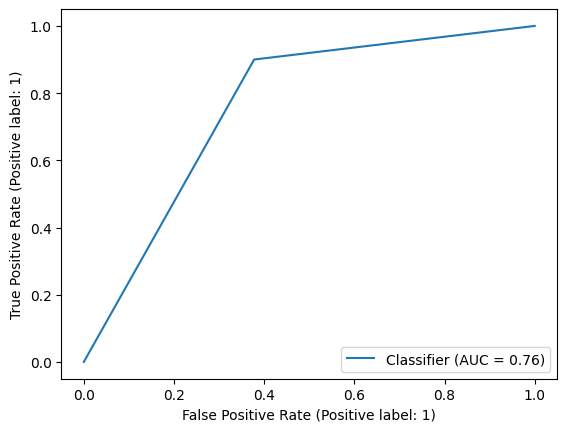

In [2]:
X_train, X_test, y_train, y_test = read_and_standardize_data(True, "blues")

model: cl.Classifier = cl.Classifier(X_train, y_train)

model.pre_process("KW")

model.train("one_vs_all", distance_type="euclidean")

model.predict(X_test, y_test)

model.get_statistics(y_test, True)